In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def jacobi(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    errors = []

    for k in range(max_iterations):
        x_new = np.zeros_like(x)

        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]

        err = np.linalg.norm(x_new - x, ord=np.inf)
        errors.append(err)

        if err < tol:
            return x_new, k + 1, True, errors

        x = x_new

    return x, max_iterations, False, errors


def gauss_seidel(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    errors = []

    for k in range(max_iterations):
        x_new = x.copy()

        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - s1 - s2) / A[i][i]

        err = np.linalg.norm(x_new - x, ord=np.inf)
        errors.append(err)

        if err < tol:
            return x_new, k + 1, True, errors

        x = x_new

    return x, max_iterations, False, errors

In [3]:
A = np.array([
    [3.0,   -0.1,  -0.2],
    [0.1,    7.0,  -0.3],
    [0.3,   -0.2,  10.0]
], dtype=float)

b = np.array([7.85, -19.3, 71.4], dtype=float)

x0 = np.array([0.0, 0.0, 0.0], dtype=float)
tols = [1e-3, 1e-6, 1e-9]
max_iterations = 100000

In [4]:
results = {}

for tol in tols:
    jac_sol, jac_iters, jac_conv, jac_errs = jacobi(A, b, x0, tol, max_iterations)
    gs_sol, gs_iters, gs_conv, gs_errs = gauss_seidel(A, b, x0, tol, max_iterations)

    results[tol] = (jac_sol, jac_iters, jac_conv, jac_errs, gs_sol, gs_iters, gs_conv, gs_errs)

    print("Tolerance:", tol)
    print("  Jacobi -> Converged:", jac_conv, "Iterations:", jac_iters, "Solution:", jac_sol)
    print("  Gauss-Seidel -> Converged:", gs_conv, "Iterations:", gs_iters, "Solution:", gs_sol)
    print()

Tolerance: 0.001
  Jacobi -> Converged: True Iterations: 4 Solution: [ 3.0000225  -2.50000266  6.99998104]
  Gauss-Seidel -> Converged: True Iterations: 4 Solution: [ 3.00000035 -2.50000004  6.99999999]

Tolerance: 1e-06
  Jacobi -> Converged: True Iterations: 7 Solution: [ 3.  -2.5  7. ]
  Gauss-Seidel -> Converged: True Iterations: 5 Solution: [ 3.  -2.5  7. ]

Tolerance: 1e-09
  Jacobi -> Converged: True Iterations: 9 Solution: [ 3.  -2.5  7. ]
  Gauss-Seidel -> Converged: True Iterations: 7 Solution: [ 3.  -2.5  7. ]



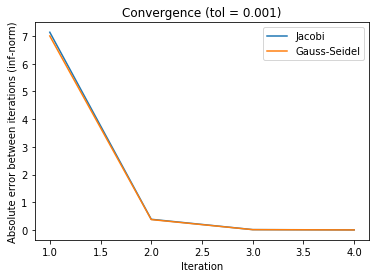

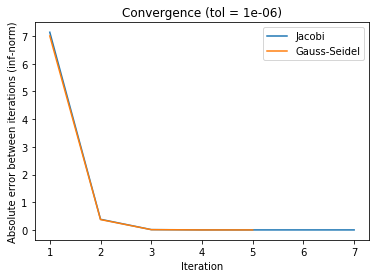

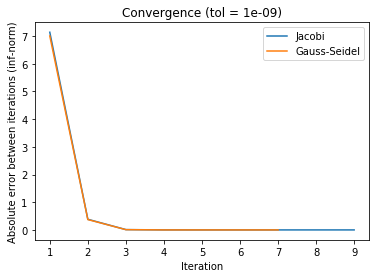

In [5]:
for tol in tols:
    jac_sol, jac_iters, jac_conv, jac_errs, gs_sol, gs_iters, gs_conv, gs_errs = results[tol]

    plt.plot(range(1, len(jac_errs) + 1), jac_errs, label="Jacobi")
    plt.plot(range(1, len(gs_errs) + 1), gs_errs, label="Gauss-Seidel")

    plt.xlabel("Iteration")
    plt.ylabel("Absolute error between iterations (inf-norm)")
    plt.title("Convergence (tol = " + str(tol) + ")")
    plt.legend()
    plt.show()

As the tolerance becomes smaller, both Jacobi and Gauss-Seidel need more iterations in order to converge because the stopping condition condition gets more strict and the change between the iterations needs to get smaller before the method stops. Gauss-Seidel will converge in less iterations than Jacobi becuase it uses the newest values immediately during each iteration and speeds up the convergence. The plot shows the error going down as the iterations increase and a tighter tolerance extends the run since the error needs to drop to a lower threshhold. 